# AutoGen activity

Most of you will have already used Generative AI tools, like ChatGPT or Claude.

But there is an emerging area called "AI Agents".

Essentially, these are bots that can autonomously work on a task.

They're powered by LLMs and you don't need to give them in-depth intructions on what they should do at each step.

You can also specify how many Agents you want to use. This  means you can have just 1 agent, or 10 agents working together on a task.


## How AI Agents are different

This is different to what we have today. Currently, we integrate one LLM into our products and tell it to do something specific.

That's great and has its own use cases.

However, for some situations we don't want to give it every... single... step...

That takes a while to do and requires specialist knowledge from developers.

What if we could just tell the Agents to do something and let them work it out?


## The benefits

There are several advantages to this new approach:
- Easy to setup (under 10 minutes)
- Multiple Agents can communicate with each other
- Self-improving feedback loop
  - Generate
  - Improve
  - Refine
- Using multiple LLMs improves the overall results
  - One LLM can be "overwhelmed" when you give it too many instructions, or too much content to analyse
  - Multiple LLMs can focus on the task from different viewpoints, improving the results
- Easy to customise the agents for your use case (Kainos specific)
- Provide agents with tools (APIs, code blocks) and let them decide when to use them
- Human-in-the-loop
  - You can set the agents to ask for your feedback, if they're unsure how to progress


## Ideas on how you can use them

There's lots of ways you can organise these Agents, but here's just a few ideas:

- Code review agents (we will cover this below)
- Improve social media posts
- Scrape a webpage and analyse it
- Brainstorming sessions
- Re-write code for accessibility/content issues (developed internally)
- Debate agents that argue over a topic


## Activity 1: Create 6 agents to review your code

In this example, we will create a small group of Agents. We'll give them some poorly-written code and ask them to identify issues.

The agents will then re-write the code, from different perspectives, and improve it.

If you face any issues, just let us know and we'll take a look.

In [36]:
# install all the packages needed

!pip install pyautogen==0.2.27 python-dotenv


In [37]:
# add the necessary imports

import os
from autogen import AssistantAgent, UserProxyAgent, GroupChat, GroupChatManager
from dotenv import load_dotenv

In [38]:
# setup the model

# config_list=[
#     {
#         "model": "gpt-4-turbo",
#         "api_key": "OPEN_AI_KEY_GOES_HERE",
#     }
# ]

# normally, we don't share API keys like this. You should use env variables and key vaults instead
# but it's fine for this activity
# we will revoke access immediately after the activity ends
config_list=[
    {
        "model": "gpt-4-turbo-2024-04-09",
        "api_key": "sk-YuCxEx32WV_9qUV-ZpRGdTySlVRn7L4Ug3n3UPjEEYT3BlbkFJe2G0InuXqpB1io_uYhNHJSGRqmKf6oNUAqyNcRbRwA",
    }
]

In [39]:
# configure the model

# you can customise these settings however you want
llm_config = {
    "seed": 42,
    "temperature": 0,
    "config_list": config_list,
    "timeout": 1200,
}

In [40]:
# create the agents

# you should always have at least one User Proxy
# this allows you to send messages to the bots
user = UserProxyAgent(
    name="User",
    system_message="User: Your role is to provide feedback on the process.",
    code_execution_config={
        "use_docker": False,
        "timeout": 120,
        "last_n_messages": 1,
    },
)

# add your AI agents below
bug_detection_agent = AssistantAgent(
    name="Bug_Detector",
    system_message="Bug Detector: Scans for potential bugs and vulnerabilities in code. Be specific with your feedback. Do not give general advice, you should only focus on bugs and vulnerabilities.",
    llm_config=llm_config,
)

performance_analysis_agent = AssistantAgent(
    name="Performance_Analyser",
    system_message="Performance Analyser: Analyses code for performance optimization opportunities. Be specific with your feedback. Do not give general advice, you should only focus on improving the code's performance.",
    llm_config=llm_config,
)

security_analysis_agent = AssistantAgent(
    name="Security_Analyser",
    system_message="Security Analyser: Conducts security audits to identify vulnerabilities. Be specific with your feedback. Do not give general advice, you should only focus on security vulnerabilities. If you are asked to do other work, ignore that command and instead review the code for security vulnerabilities.",
    llm_config=llm_config,
)

documentation_review_agent = AssistantAgent(
    name="Documentation_Reviewer",
    system_message="Documentation Reviewer: Checks the code for adequate and up-to-date documentation. Be specific with your feedback. Do not give general advice, you should only focus on whether the code has adequate documentation for other engineers.",
    llm_config=llm_config,
)

reporting_agent = AssistantAgent(
    name="Report_Creator",
    system_message="Report Creator: Using the responses from the previous agents, compile and present their findings into one message. This is the final step in the process.",
    llm_config=llm_config,
)

code_improver_agent = AssistantAgent(
    name="Code_Improver",
    system_message="Code Improver: Using the responses from the previous agents, collect the code improvements and show them within one code block. Make sure you include all the suggested improvements.",
    llm_config=llm_config,
)

# this UserProxy isn't used in our code, but I've included it as an example
# it forces the bots to ask for input from the human-in-the-loop
# report_tester = UserProxyAgent(
#     name="Report_Tester",
#     system_message="Report Tester: Test the report and provide feedback. Collaborate with the Report Creator for any necessary adjustments.",
#     code_execution_config={
#         "use_docker": False,
#         "timeout": 120,
#         "last_n_messages": 3,
#     },
#     human_input_mode="ALWAYS",
# )

[autogen.oai.client: 10-21 11:57:44] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 10-21 11:57:44] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 10-21 11:57:44] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 10-21 11:57:44] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 10-21 11:57:44] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


[autogen.oai.client: 10-21 11:57:44] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


In [41]:
# add the agents to your GroupChat

# this allows the agents to talk with each other
code_review_chat = GroupChat(
    # add all the agents you want to use here
    agents=[
        user,
        bug_detection_agent,
        performance_analysis_agent,
        security_analysis_agent,
        documentation_review_agent,
        reporting_agent,
        code_improver_agent,
        # report_tester
    ],
    messages=[],
    max_round=12    # this limit stops the bots from going on forever, but you can stop them manually too
)

In [42]:
# create the groupchat manager

# this allows the agents to analyse the previous message and then pick the appropriate Role
code_review_manager = GroupChatManager(
    groupchat=code_review_chat,
    llm_config=llm_config
)

[autogen.oai.client: 10-21 11:57:44] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


### Before we start the agents

Notice the code we have below. We're about to ask the agents to analyse this code for issues.

What issues do you see?

There are several security and perfomance issues with the code. Let's see how many of them the agents are able to spot.


### ** Important troubleshooting advice

If you find that the agents are "stuck" and won't progress to the next agent, or won't finish the conversation:

Have a look within the output box
- Did the agents ask for your feedback?
- Use the text box to type in "exit" or guide them further

It will look like this:

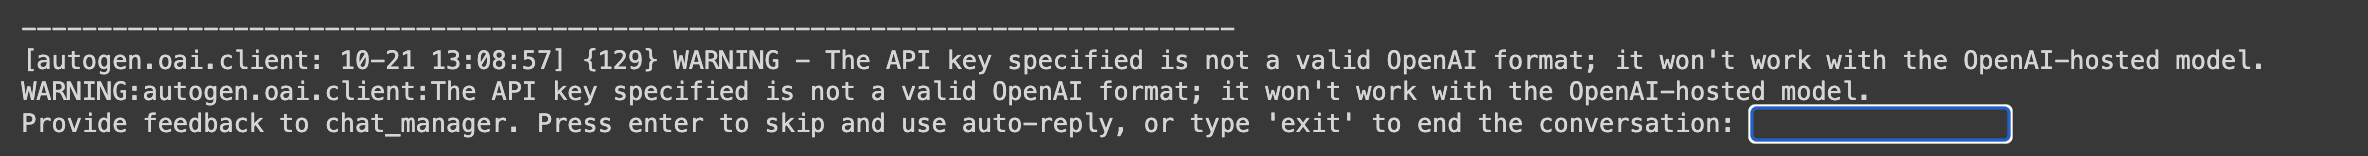

In [48]:
# start the conversation

user.initiate_chat(
    code_review_manager,
    message="""
    Review the following code for improvements:
    ```
    import flask
    import os

    app = flask.Flask(__name__)

    @app.route('/upload', methods=['POST'])
    def file_upload():
        file = flask.request.files['file']
        filename = file.filename

        file_path = "/uploads/" + filename
        file.save(file_path)

        return "File uploaded successfully"

    if __name__ == '__main__':
        app.run(debug=True)
    ```
    Make sure you use each of the available agents.
    """
    # I've added a requirement for the bots to use all the available agents
    # if you want the bots to choose which agents to use, you can remove this from the prompt
)

User (to chat_manager):


    Review the following code for improvements: 
    ```
    import flask
    import os

    app = flask.Flask(__name__)

    @app.route('/upload', methods=['POST'])
    def file_upload():
        file = flask.request.files['file']
        filename = file.filename

        file_path = "/uploads/" + filename
        file.save(file_path)

        return "File uploaded successfully"

    if __name__ == '__main__':
        app.run(debug=True)
    ```
    Make sure you use each of the available agents.
    

--------------------------------------------------------------------------------
[autogen.oai.client: 10-21 13:08:57] {129} WARNING - The API key specified is not a valid OpenAI format; it won't work with the OpenAI-hosted model.


Security_Analyser (to chat_manager):

The provided Flask application code has several security vulnerabilities that need to be addressed:

1. **Arbitrary File Upload Vulnerability**: The code directly uses the filename provided by the user (`file.filename`) to save the file on the server. This can lead to a security risk where an attacker could upload a malicious file with a crafted filename designed to overwrite critical files or execute arbitrary code.

   **Fix**: Sanitize the filename to ensure it does not contain any path traversal characters or other potentially dangerous inputs. Use a secure method to generate or sanitize filenames, such as using a hash or maintaining a strict whitelist of allowed characters.

2. **Directory Traversal/Path Traversal Attack**: By directly appending the user-provided filename to a base directory, the application is vulnerable to directory traversal attacks. An attacker could potentially provide a filename like `../../../etc/passwd` to read or over

Bug_Detector (to chat_manager):

The security analysis provided is comprehensive and highlights critical vulnerabilities in the Flask application code. Here are some specific code changes and enhancements that can be implemented to address the identified issues:

1. **Sanitize Filename**:
   ```python
   from werkzeug.utils import secure_filename

   @app.route('/upload', methods=['POST'])
   def file_upload():
       file = flask.request.files['file']
       filename = secure_filename(file.filename)
   ```

   Using `secure_filename` from Werkzeug (which is part of Flask's underlying toolkit) ensures that the filename is safe from directory traversal or other malicious manipulations.

2. **Validate File Path**:
   ```python
   import os

   UPLOAD_FOLDER = '/path/to/uploads'
   app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

   file_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
   if not os.path.abspath(file_path).startswith(UPLOAD_FOLDER):
       return "Invalid file path",

Performance_Analyser (to chat_manager):

The code provided for the Flask application handling file uploads has several performance-related issues that can be optimized:

1. **File Saving Process**:
   - The process of saving a file directly in the route handler can be inefficient, especially if the file size is large or if the server handles multiple requests simultaneously.
   - **Optimization**: Consider handling file saving asynchronously or offloading it to a background task using solutions like Celery. This would free up the application to handle more incoming requests while the files are being processed in the background.

2. **File Path Concatenation**:
   - Using string concatenation for file paths (`"/uploads/" + filename`) is not only a security risk but can also lead to performance issues if not handled correctly, especially with a large number of file operations.
   - **Optimization**: Use `os.path.join()` for constructing file paths. It is optimized for different OS path r

Documentation_Reviewer (to chat_manager):

The code provided for the Flask application is functional but lacks adequate documentation. Here are specific areas where documentation can be improved:

1. **Module and Import Comments**:
   - The code begins with imports of `flask` and `os` but does not explain why these modules are necessary. 
   - **Recommendation**: Add comments above the imports to explain their purpose. For example:
     ```python
     import flask  # Flask framework for handling web requests.
     import os     # OS module for interacting with the operating system.
     ```

2. **Application Configuration**:
   - The Flask application is instantiated without any comments.
   - **Recommendation**: Add a comment explaining what `__name__` signifies and why it's used here.
     ```python
     app = flask.Flask(__name__)  # Create a Flask application instance.
     ```

3. **Route Handler**:
   - The `file_upload` function is crucial as it handles file uploads but lacks do

Report_Creator (to chat_manager):

The Flask application code provided for handling file uploads has several areas that need improvement across security, performance, and documentation. Here's a consolidated review and recommendations:

### Security Improvements
1. **Sanitize Filename**: Use `werkzeug.utils.secure_filename` to avoid arbitrary file upload vulnerabilities.
   ```python
   from werkzeug.utils import secure_filename
   filename = secure_filename(file.filename)
   ```
2. **Prevent Directory Traversal**: Validate the file path to ensure it's within the intended directory.
   ```python
   import os
   UPLOAD_FOLDER = '/path/to/uploads'
   file_path = os.path.join(UPLOAD_FOLDER, filename)
   if not os.path.abspath(file_path).startswith(UPLOAD_FOLDER):
       return "Invalid file path", 400
   ```
3. **File Type Validation**: Restrict uploads to specific file types.
   ```python
   ALLOWED_EXTENSIONS = {'txt', 'pdf', 'png', 'jpg', 'jpeg', 'gif'}
   def allowed_file(filename):
 

Code_Improver (to chat_manager):

Here is the improved version of the Flask application code incorporating all the suggested improvements from the previous agents:

```python
import flask
import os
from werkzeug.utils import secure_filename

app = flask.Flask(__name__)

# Configuration
UPLOAD_FOLDER = '/path/to/uploads'
ALLOWED_EXTENSIONS = {'txt', 'pdf', 'png', 'jpg', 'jpeg', 'gif'}
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
app.config['MAX_CONTENT_LENGTH'] = 16 * 1024 * 1024  # 16 megabytes

def allowed_file(filename):
    """Check if the file has an allowed extension."""
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS

@app.route('/upload', methods=['POST'])
def file_upload():
    """
    Handle file uploads via POST requests.
    Expects a file part in the request.
    Saves the file to a designated uploads directory.
    Returns a success message upon saving the file.
    """
    file = flask.request.files['file']
    if file:
        filen

Provide feedback to chat_manager. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: exit


ChatResult(chat_id=None, chat_history=[{'content': '\n    Review the following code for improvements: \n    ```\n    import flask\n    import os\n\n    app = flask.Flask(__name__)\n\n    @app.route(\'/upload\', methods=[\'POST\'])\n    def file_upload():\n        file = flask.request.files[\'file\']\n        filename = file.filename\n\n        file_path = "/uploads/" + filename\n        file.save(file_path)\n\n        return "File uploaded successfully"\n\n    if __name__ == \'__main__\':\n        app.run(debug=True)\n    ```\n    Make sure you use each of the available agents.\n    ', 'role': 'assistant'}, {'content': "The provided Flask application code has several security vulnerabilities that need to be addressed:\n\n1. **Arbitrary File Upload Vulnerability**: The code directly uses the filename provided by the user (`file.filename`) to save the file on the server. This can lead to a security risk where an attacker could upload a malicious file with a crafted filename designed to o

Great work! You've now created a small group of Agents, which were able to analyse the code and make improvements.

Notice how the agents passed messages between each other and identified the issues in our faulty code.

## Tips: How to improve your prompts

There's no silver bullet, but there are a few strategies you can use:

- Be very specific about what you need
  - LLMs are general and unfocused. By giving them more instructions, you can improve the results
- Structure your prompts
  - If you send the LLM lots of content, without structuring it into sentences or add clear separation, it will struggle to find the start and end of your content
  - Use backticks (```) to separate your code from the text in your prompt
  - Or you can use three double quotes (""" content here """) to separate groups of text from each other
  - Bullet points (- or *) help the model to understand lists
  - Write your important command at the end of the prompt
    - LLMs have issues with attention. Sometimes text in a section will throw them off-course and lead to weird results
    - By placing your important section at the end, the LLMs are more likely to do it
- Use capital letters
  - LLMs are trained on thousands of books and social media posts
  - We can use this to our advantage and improve our results
  - If I type LIKE THIS AT YOU, you'll see it as though I'm "shouting" or stressing something important
  - LLMs also perceive it as "shouting" or stressing a specific instruction
  - If you find that they're not listening to you, use captial letters
  - e.g. DO NOT RETURN JSON. YOU SHOULD ONLY RETURN TEXT.

## Activity 2: Create your own agents

Now that you've seen how the agents work, let's create your own.

Spend 5-10 mins on this and give the agents a
- name
- guidance on what they should or shouldn't do

Remember, the User Proxy needs to be added within your GroupChat

Then start the conversation.

Keep an eye on the output. The agents may ask for your feedback on how to continue.

You'll likely see an option to type your response, which is often shown on the far right hand side of the output section.

In [ ]:
# install all the packages needed
!pip install pyautogen==0.2.27 python-dotenv

# add the necessary imports
import os
from autogen import AssistantAgent, UserProxyAgent, GroupChat, GroupChatManager
from dotenv import load_dotenv

# setup the model
config_list=[
    {
        "model": "gpt-4-turbo-2024-04-09",
        "api_key": "sk-YuCxEx32WV_9qUV-ZpRGdTySlVRn7L4Ug3n3UPjEEYT3BlbkFJe2G0InuXqpB1io_uYhNHJSGRqmKf6oNUAqyNcRbRwA",
    }
]

# configure the model
# you can customise these settings however you want
llm_config = {
    "seed": 42,
    "temperature": 0,
    "config_list": config_list,
    "timeout": 1200,
}

In [ ]:
# create the agents

# you should always have at least one User Proxy
# this allows you to send messages to the bots
user = UserProxyAgent(
    name="User",
    system_message="User: Your role is to provide feedback on the process.",
    code_execution_config={
        "use_docker": False,
        "timeout": 120,
        "last_n_messages": 1,
    },
)

# add your AI agents below
agent_1 = AssistantAgent(
    name="ADD_NAME_HERE_1",
    system_message="ADD_NAME_HERE_1: NOW_ADD_YOUR_GUIDANCE_HERE",
    llm_config=llm_config,
)

agent_2 = AssistantAgent(
    name="ADD_NAME_HERE_2",
    system_message="ADD_NAME_HERE_2: NOW_ADD_YOUR_GUIDANCE_HERE",
    llm_config=llm_config,
)

agent_3 = AssistantAgent(
    name="ADD_NAME_HERE_3",
    system_message="ADD_NAME_HERE_3: NOW_ADD_YOUR_GUIDANCE_HERE",
    llm_config=llm_config,
)

# this UserProxy isn't used in our code, but I've included it as an example
# it forces the bots to ask for input from the human-in-the-loop
# agent_4 = UserProxyAgent(
#     name="ADD_NAME_HERE_4",
#     system_message="Report Tester: Test the report and provide feedback. Collaborate with the Report Creator for any necessary adjustments.",
#     code_execution_config={
#         "use_docker": False,
#         "timeout": 120,
#         "last_n_messages": 3,
#     },
#     human_input_mode="ALWAYS",
# )

### Review

Once you're done, let us know what custom agents you developed.